# Python for Machine Learning

### *Session \#5*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Probability and Bayes Theorem

### Exercises
---

**You are planning a picnic, but it's cloudy outside! Should we still go?**

**1. We have data on 300 days, and 135 of them are cloudy. What's the probability of a cloudy day,** `P(C)`**?**

In [266]:
120/300

0.4

**2. It only rains on 30 out of 300 days. What's the probability of rain,** `P(R)`**?**

In [267]:
30/300

0.1

**3. Of the rainy days, 15 of them were cloudy. What's the probability of** `P(C|R)` **?**

In [ ]:
15/30

**4. Use Bayes' Theorem to find the chance of rain, given that it's cloudy:** `P(R|C)`

In [ ]:
# P(C|R)P(R)/P(C)

(135)

**5. New example: Are you being cheated in a coin flip? Assume that 9 out of 10 coins are fair.**

**What's the probability you're dealing with a fair coin** `P(F)`**? Probability of an unfair coin** `P(U)`**?**

In [ ]:
# P(F)
9/10 

# P(U)
1/10

**6. Now you see the coin land heads 4 times in a row.** 

**What's the probability of this happening with a fair coin, i.e.** `P(HHHH|F)` **?**

In [ ]:
# P(HHHH|F)

0.5 * 0.5 * 0.5 * 0.5

**7. Unfair coins land heads 90% of the time.** 

**What's the probability of this happening with an unfair coin, i.e.** `P(HHHH|U)` **?**

In [ ]:
# P(HHHH|U)

0.9 * 0.9 * 0.9 * 0.9

### Extra Credit
---

**1. Use Bayes Theorem to compute the probability that the coin is unfair, i.e.** `P(U|HHHH)` 

Hint: You'll need `P(HHHH)`, the overall chance of getting 4 heads. To get this we need to combine `P(HHHH|F)` and `P(HHHH|U)`, weighted for how likely each type of coin is.

Summed up:  `P(HHHH|F)P(F)` + `P(HHHH|U)P(U)`

## II. Multinomial Naive Bayes

### Warm Ups

*Type the given code into the cell below*

---

In [216]:
%matplotlib inline
from matplotlib import pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

df = pd.read_csv("spam.csv", encoding = 'latin-1')
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Vectorize the words:** 
```
vec = CountVectorizer(stop_words='english', max_features=20)
```

In [311]:
vec = CountVectorizer(stop_words='english', max_features=20)

**Create pipeline:** 
```
pipe = make_pipeline(vec, MultinomialNB())
```

**Validation Curve:** 
```python
model_vc = ValidationCurve(pipe, 'multinomialnb__alpha', range(1, 12))
model_vc.fit(X_train, y_train)
```

### Exercises
---

**1. Create a variable** `ham` **for the text from rows of** `df` **that are categorized as ham.** 

**Likewise, create a variable** `spam` **for the text from rows of** `df` **that are categorized as spam**


Hint: Use boolean fitering first, then grab the `text` column

In [227]:
ham = df[df['category'] == 'ham'].text
spam = df[df['category'] == 'spam'].text

**2. The code below will fetch the number of times each feature (ie word) occurs**

**Use** `plt.barh()` **to show a histogram of the most common** `ham` **words**

Hint: `.barh()` expects a list of labels, then a list of values.

<BarContainer object of 20 artists>

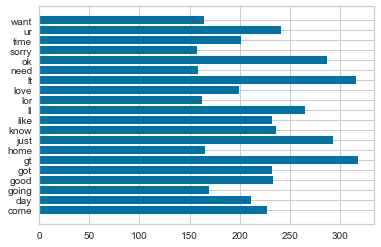

In [316]:
ham_counts = np.asarray(vec.fit_transform(ham).sum(axis=0))[0]
ham_features = vec.get_feature_names()

plt.barh(ham_features, ham_counts)

**3. Now fit** `vec` **to the** `spam` **dataset. Adapt the code above to create** `spam_counts` **and** `spam_features`

**Use** `plt.barh()` **to show a histogram of the most common** `spam` **words**

<BarContainer object of 20 artists>

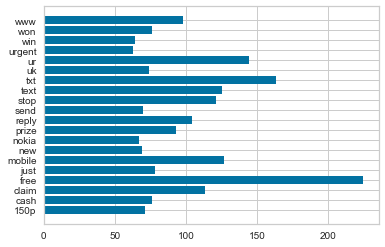

In [317]:
spam_counts = np.asarray(vec.fit_transform(spam).sum(axis=0))[0]
spam_features = vec.get_feature_names()

plt.barh(spam_features, spam_counts)

**4. Create a pipeline with a new** `CountVectorizer()` **and a** `MultinomialNB()` **model. You will need to:** 

* Create the pipeline
* Fit the model to the training set
* Score the model on the test set

In [238]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9820531227566404

**5. The model's** `alpha` **parameter adjusts how much.**

**Use a validation curve to choose a good value for** `alpha`

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12d6e3390>,
                cv=None, groups=None, logx=False, model=None, n_jobs=1,
                param_name='multinomialnb__alpha',
                param_range=array([0.001, 0.005, 0.1  , 0.2  ]),
                pre_dispatch='all', scoring=None)

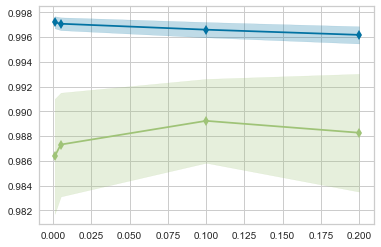

In [246]:
curve = ValidationCurve(pipe, 'multinomialnb__alpha', [0.001, 0.005, 0.1, 0.2])
curve.fit(X_train, y_train)

## III. Multi-Class and Twitter Bot 

### Warm Ups

*Type the given code into the cell below*

---

In [247]:
%pip install tweepy
import tweepy
from random import choices

tweets = pd.read_csv("tweets.csv")

Note: you may need to restart the kernel to use updated packages.


### Exercises
---

**1. Create a pipeline with a new CountVectorizer() saved as** `vec` **and a MultinomialNB() saved as** `model` **and train it on** `tweets` 

**What is the accuracy of the model?**

Hint: For easy access, create `vec` and `model` before placing them in a pipeline

In [269]:
X = tweets['content']
y = tweets['author']
X_train, X_test, y_train, y_test = train_test_split(X, y)

vec = CountVectorizer()
model = MultinomialNB()
pipe = make_pipeline(vec, model)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6337545676004872

**2. Plot a** `ConfusionMatrix` **of your model. Which celebrity is hardest to classify?**         

/Users/rcarrington/opt/anaconda3/envs/machine_learning_bootcamp/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.6337545676004872

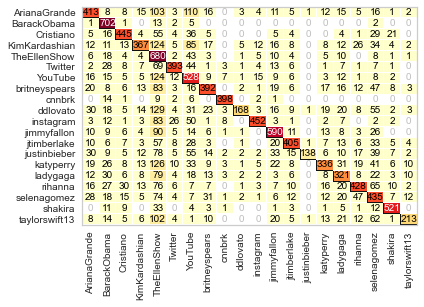

In [270]:
pipe_cm = ConfusionMatrix(pipe)
pipe_cm.score(X_test, y_test)

**3. CountVectorizer allows for many parameters to improve the quality of data it produces for your model. Use the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to fine-tune your model with different combinations**

Note: We will learn how to automate this process with Grid Search in the next class

In [292]:
vec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=2)
model = MultinomialNB()
pipe = make_pipeline(vec, model)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6682399512789281

**4. The code below will select words at random, according to how frequently they're used by the chosen celebrity**

**Change the** `celeb_index` **and** `num_words` **to get different randomly generated tweets**

Hint: Use `model.classes_` to choose a specific celebrity

In [296]:
celeb_index = 0
num_words = 4

words = choices(vec.get_feature_names(),
                weights=model.feature_count_[celeb_index],
                k=num_words)

" ".join(words)

'know https amazing thank babes text'

**4. Run the code below to set up Tweepy**

**Pass a string to** `api.update_status()` **to send a tweet:** 

In [278]:
auth = tweepy.OAuthHandler('8hQMoNize5oshYZjaqai1DyVR', 'UhaEatmV6a0PdeuM1RWnsMNOJFHEmyNcFpsYb46czvnPJtzF1E')
auth.set_access_token('3629445439-YGOjZU7i4a455eDEtlUMmnx4koOYi0nax9ixGB7', 'eEwqBLLWKIHZAU9WwOFgAfRhclTNpUYTRG6j4k3EaJCkO')
api = tweepy.API(auth)

# Add your code down here
api.update_status("Testing testing 123 -- student tweets incoming!")

Status(_api=<tweepy.api.API object at 0x1371ab790>, _json={'created_at': 'Tue Apr 14 21:12:43 +0000 2020', 'id': 1250170143319240705, 'id_str': '1250170143319240705', 'text': 'Testing testing 123 -- student tweets incoming!', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://www.robcarrington.com/sociologydemo" rel="nofollow">SociologyDemo</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3629445439, 'id_str': '3629445439', 'name': 'Rob Carrington', 'screen_name': 'imrobcarrington', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 42, 'friends_count': 304, 'listed_count': 0, 'created_at': 'Sun Sep 20 18:13:37 +0000 2015', 'favourites_count': 1426, 'utc_offset': None, 'time_zone': None, 'geo_enabled': Fal